## XGBOOST PREDICTIONS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline 

In [2]:
###Don't keep this hard-coded
matches = pd.read_csv('matches.csv')
keep_cols = list(matches.columns[2:4]) + list(matches.columns[63:])
matches = matches[keep_cols]
matches = pd.get_dummies(matches,columns=['league_id'])
test = matches.loc[matches.season=='2015/2016']
train = matches.loc[matches.season!='2015/2016']
test = test.drop(columns='season')
train = train.drop(columns='season')

In [3]:
X = train.drop(columns='outcome')
y = train.outcome
params = {'min_child_weight':[i for i in range(1,6)], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

xgb = XGBClassifier(objective='multi:softmax', num_class=3, seed=50)
xgb_cv = RandomizedSearchCV(xgb, params,cv=10,random_state=100)
xgb_cv.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_c...
                                           subsample=None, tree_method=None,
                                           validate_parameters=False,
                                           verbosity=None),
                 

{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 2, 'gamma': 0.4, 'colsample_bytree': 0.6}
0.8851007132220393


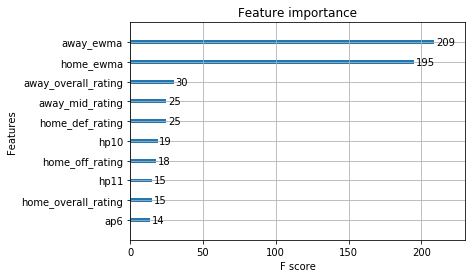

In [4]:
print(xgb_cv.best_params_)
print(xgb_cv.best_score_) 
plot_importance(xgb_cv.best_estimator_,max_num_features=10)

In [5]:
predictions = xgb_cv.predict_proba(test.drop(columns='outcome'))
predicted = xgb_cv.predict(test.drop(columns='outcome'))

In [6]:
test['away_prob'] = predictions[:,0]
test['draw_prob'] = predictions[:,1]
test['home_prob'] = predictions[:,2]
test['prediction'] = predicted

In [7]:
(test.outcome==test.prediction).sum()/test.shape[0]

0.8860898138006572